# **1. Market Outlook and Scenario Forecast**

# General 510050.SS Market Analysis

## **Yahoo Finance**


In [131]:
import yfinance as yf
import pandas as pd
!pip install ta
from ta.volatility import AverageTrueRange

In [132]:
# Set ticker and period
ticker = "510050.SS"
period = "6mo"  # последние 6 месяцев

# Download data from Yahoo Finance
data = yf.download(ticker, period=period)

[*********************100%***********************]  1 of 1 completed


In [133]:
# Combine both levels into single column names (e.g., 'Close_510050.SS', 'High_510050.SS', ...)
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

In [134]:
data = data.rename(columns={
    'Close_510050.SS': 'Close',
    'High_510050.SS': 'High',
    'Low_510050.SS': 'Low',
    'Open_510050.SS': 'Open',
    'Volume_510050.SS': 'Volume'
})

In [135]:
# Display the data
data.tail(10)

,Close,High,Low,Open,Volume
Date,,,,,
2025-06-03,2.748,2.761,2.734,2.740,501260254
2025-06-04,2.755,2.764,2.748,2.751,318023306
2025-06-05,2.754,2.761,2.745,2.760,416479500
2025-06-06,2.756,2.768,2.751,2.758,506736659
2025-06-09,2.756,2.767,2.747,2.758,709788198
2025-06-10,2.742,2.767,2.735,2.758,917943537
2025-06-11,2.762,2.776,2.741,2.742,585072791
2025-06-12,2.760,2.766,2.741,2.758,392650273
2025-06-13,2.746,2.760,2.736,2.755,651201333


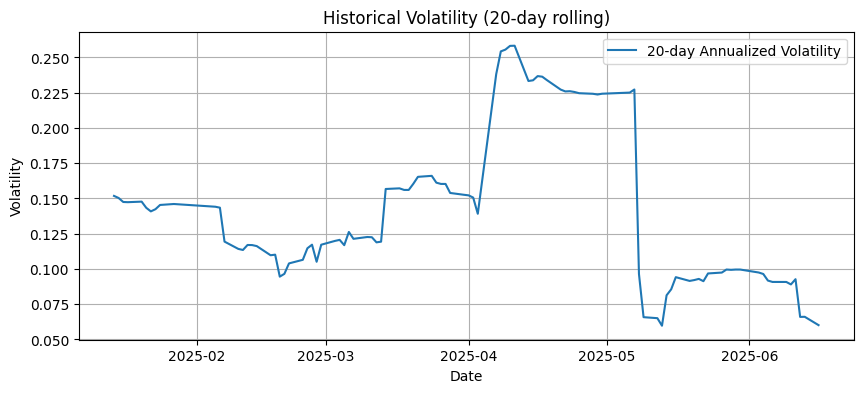

In [136]:
#Historical volatility

import numpy as np

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Calculate rolling 20-day historical volatility (annualized)
data['Volatility_20d'] = data['Return'].rolling(window=20).std() * np.sqrt(252)

# Plot historical volatility
plt.figure(figsize=(10, 4))
plt.plot(data['Volatility_20d'], label='20-day Annualized Volatility')
plt.title('Historical Volatility (20-day rolling)')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


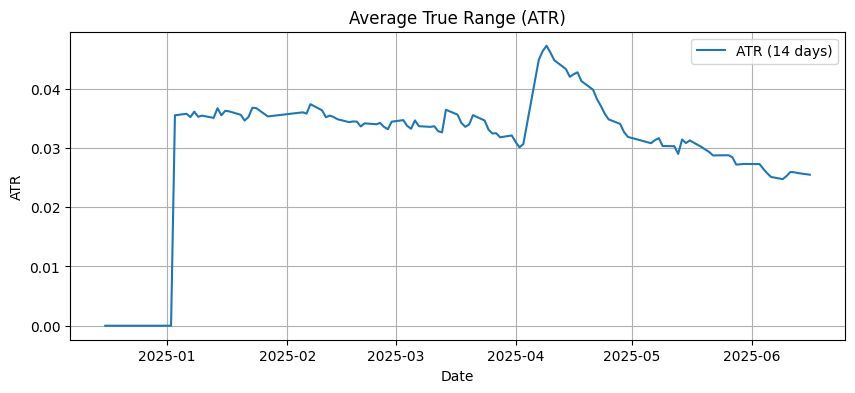

In [137]:
from ta.volatility import AverageTrueRange

# Calculate ATR (14-day window by default)
atr_indicator = AverageTrueRange(
    high=data['High'], 
    low=data['Low'], 
    close=data['Close'], 
    window=14
)
data['ATR_14'] = atr_indicator.average_true_range()

# Plot ATR
plt.figure(figsize=(10, 4))
plt.plot(data['ATR_14'], label='ATR (14 days)')
plt.title('Average True Range (ATR)')
plt.ylabel('ATR')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


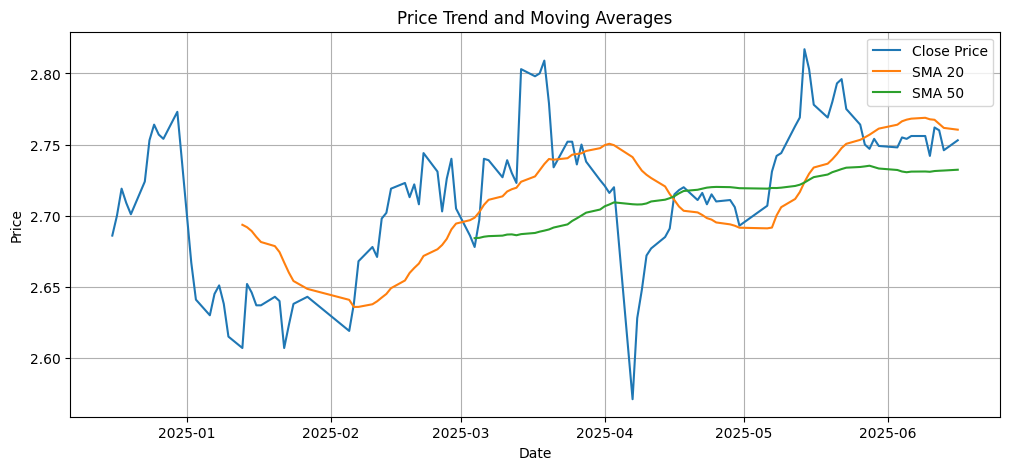

In [138]:
# Calculate moving averages
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# Plot close price with moving averages
plt.figure(figsize=(12, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA20'], label='SMA 20')
plt.plot(data['SMA50'], label='SMA 50')
plt.title('Price Trend and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

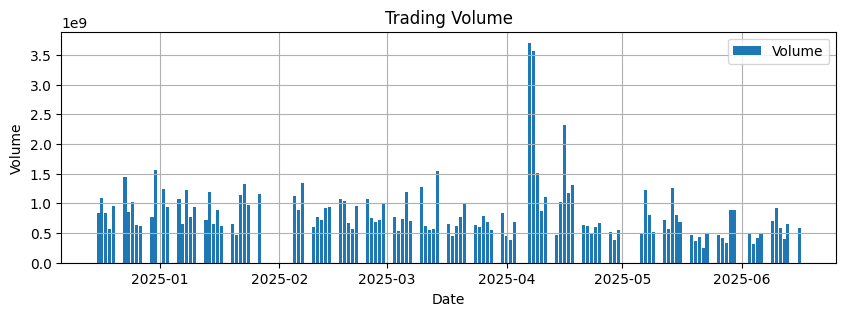

In [139]:
# Plot trading volume
plt.figure(figsize=(10, 3))
plt.bar(data.index, data['Volume'], label='Volume')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

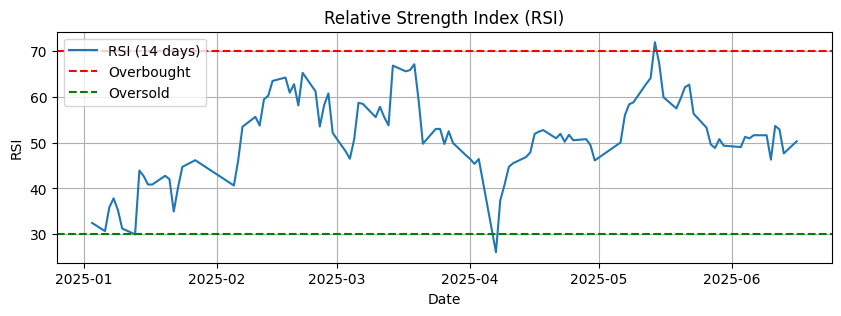

In [140]:
from ta.momentum import RSIIndicator

# Calculate RSI (14 days)
rsi_indicator = RSIIndicator(close=data['Close'], window=14)
data['RSI_14'] = rsi_indicator.rsi()

# Plot RSI
plt.figure(figsize=(10, 3))
plt.plot(data['RSI_14'], label='RSI (14 days)')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
# min/max
min_price = data['Close'].min()
max_price = data['Close'].max()
print(f"min: {min_price}, max: {max_price}")

# volatility
data['Returns'] = data['Close'].pct_change()
volatility = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
print(f"20-days volatility: {volatility.iloc[-1]:.2%}")

# moving average
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
print(f"MA20: {data['MA20'].iloc[-1]}")
print(f"MA50: {data['MA50'].iloc[-1]}")

min: 2.571000099182129, max: 2.816999912261963
20-days volatility: 6.02%
MA20: 2.76045001745224
MA50: 2.732300009727478


In [142]:
data.tail()

,Close,High,Low,Open,Volume,Return,Volatility_20d,ATR_14,SMA20,SMA50,RSI_14,Returns,MA20,MA50
Date,,,,,,,,,,,,,,
2025-06-10,2.742,2.767,2.735,2.758,917943537,-0.005080,0.089052,0.025248,2.76775,2.73086,46.290003,-0.005080,2.76775,2.73086
2025-06-11,2.762,2.776,2.741,2.742,585072791,0.007294,0.092767,0.025945,2.76740,2.73138,53.642552,0.007294,2.76740,2.73138
2025-06-12,2.760,2.766,2.741,2.758,392650273,-0.000724,0.066015,0.025878,2.76455,2.73158,52.863186,-0.000724,2.76455,2.73158
2025-06-13,2.746,2.760,2.736,2.755,651201333,-0.005072,0.066098,0.025743,2.76170,2.73174,47.645104,-0.005072,2.76170,2.73174
2025-06-16,2.753,2.757,2.735,2.737,578828372,0.002549,0.060188,0.025476,2.76045,2.73230,50.287384,0.002549,2.76045,2.73230


## **Tushare**

In [143]:
import tushare as ts

ts.set_token('your_token')
pro = ts.pro_api()


In [144]:
opt = pro.opt_basic(exchange='SSE', fields='ts_code,name,call_put,exercise_price,list_date')

In [145]:
opt_510050 = opt[opt['name'].str.contains('50ETF')]

In [146]:
opt_510050

,ts_code,name,call_put,exercise_price,list_date
0,10009224.SH,华夏上证50ETF期权2512认购2.85,C,2.85,20250424
1,10009317.SH,华夏上证50ETF期权2512认购3.00,C,3.00,20250515
2,10009318.SH,华夏上证50ETF期权2512认沽3.00,P,3.00,20250515
3,10009230.SH,华夏上证50ETF期权2512认沽2.70,P,2.70,20250424
4,10009228.SH,华夏上证50ETF期权2512认沽2.60,P,2.60,20250424
...,...,...,...,...,...
9413,10000065.SH,华夏上证50ETF期权1503认购2.60,C,2.60,20150317
9414,10000050.SH,华夏上证50ETF期权1503认沽2.50,P,2.50,20150212
9415,10000041.SH,华夏上证50ETF期权1503认购2.45,C,2.45,20150210
9416,10000082.SH,华夏上证50ETF期权1503认沽2.70,P,2.70,20150319


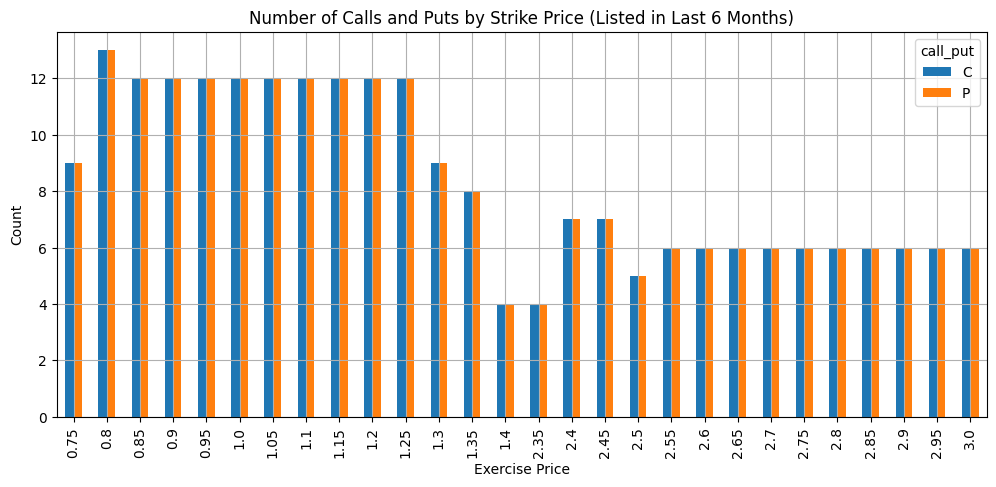

In [147]:
# Make a copy to avoid SettingWithCopyWarning
opt_510050 = opt_510050.copy()

# Convert list_date to datetime
opt_510050['list_date'] = pd.to_datetime(opt_510050['list_date'], format='%Y%m%d')

# Set the cutoff date to 6 months ago
cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=6)

# Filter options listed in the last 6 months
recent_opts = opt_510050[opt_510050['list_date'] >= cutoff_date]

# Count the number of call and put options for each strike price
strike_stats = recent_opts.groupby(['exercise_price', 'call_put']).size().unstack(fill_value=0)

# Plot the distribution by strike price
import matplotlib.pyplot as plt
strike_stats.plot(kind='bar', figsize=(12, 5))
plt.title('Number of Calls and Puts by Strike Price (Listed in Last 6 Months)')
plt.xlabel('Exercise Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Call Count: 3003, Put Count: 3003
Call/Put Ratio: 1.00


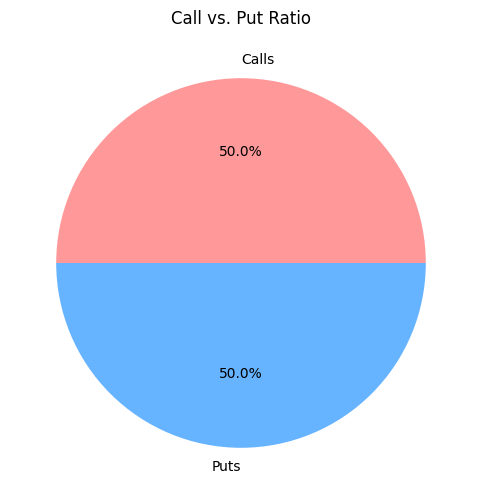

In [148]:
# 2. Call vs. Put Ratio
def calculate_call_put_ratio(df):
    # Count calls and puts
    call_count = len(df[df['call_put'] == 'C'])
    put_count = len(df[df['call_put'] == 'P'])
    total = call_count + put_count
    ratio = call_count / put_count if put_count > 0 else float('inf')
    print(f"Call Count: {call_count}, Put Count: {put_count}")
    print(f"Call/Put Ratio: {ratio:.2f}")
    # Pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([call_count, put_count], labels=['Calls', 'Puts'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
    plt.title('Call vs. Put Ratio')
    plt.show()

calculate_call_put_ratio(opt_510050)

Options Listed by Year:
 year
2015     510
2016     330
2017     310
2018     514
2019     478
2020     466
2021     414
2022     500
2023     934
2024    1142
2025     408
Name: count, dtype: int64


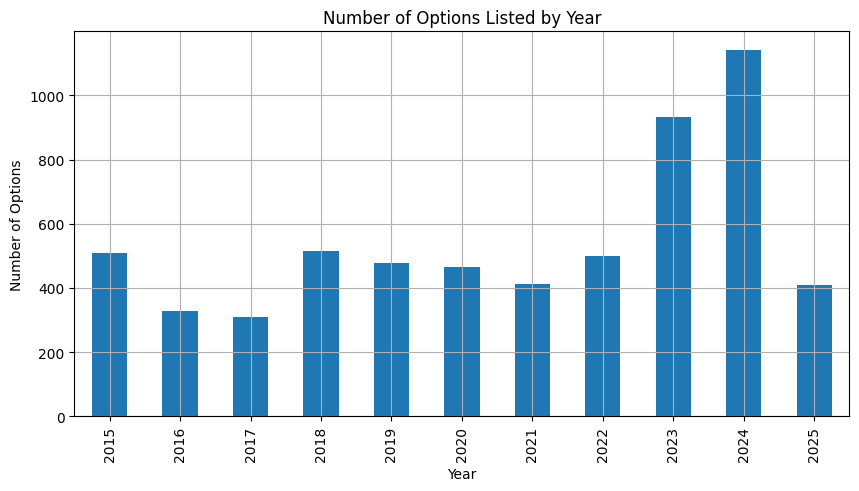

In [149]:
# Time Horizon Analysis
def analyze_time_horizon(df):
    # Convert list_date to datetime and extract year
    df['list_date'] = pd.to_datetime(df['list_date'], format='%Y%m%d')
    df['year'] = df['list_date'].dt.year
    yearly_counts = df['year'].value_counts().sort_index()
    print("Options Listed by Year:\n", yearly_counts)
    
    # Plot
    plt.figure(figsize=(10, 5))
    yearly_counts.plot(kind='bar')
    plt.title('Number of Options Listed by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Options')
    plt.grid(True)
    plt.show()

analyze_time_horizon(opt_510050)

Options Listed by Month (Last 6 Months):
 month
2024-12    60
2025-01    84
2025-02    84
2025-03    72
2025-04    98
2025-05    68
2025-06     2
Freq: M, Name: count, dtype: int64


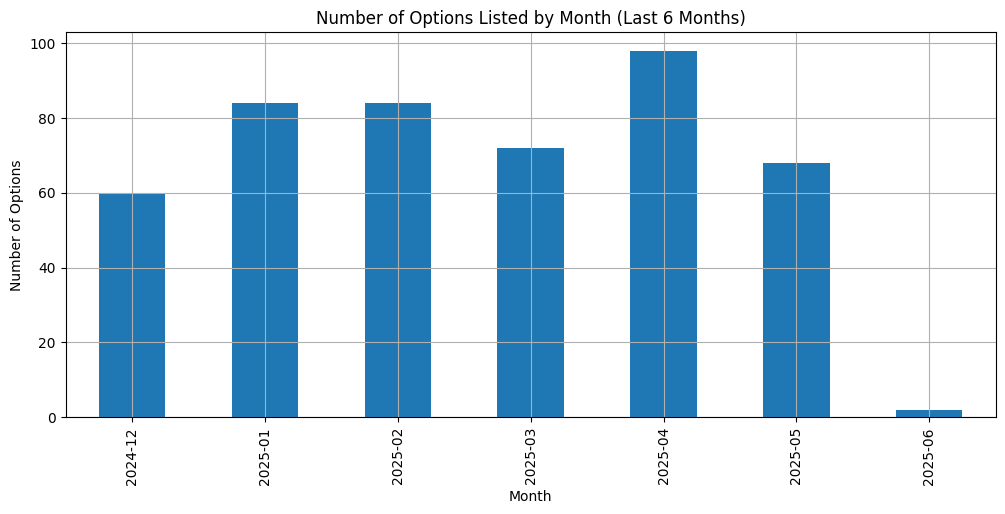

In [150]:
def analyze_time_horizon_last_6m(df):
    # Set the cutoff date to 6 months ago
    cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=6)
    # Filter options listed in the last 6 months
    df_recent = df[df['list_date'] >= cutoff_date].copy()
    # Extract year and month from list_date
    df_recent['year'] = df_recent['list_date'].dt.year
    df_recent['month'] = df_recent['list_date'].dt.to_period('M')
    # Count options by month
    monthly_counts = df_recent['month'].value_counts().sort_index()
    print("Options Listed by Month (Last 6 Months):\n", monthly_counts)
    # Plot by month
    plt.figure(figsize=(12, 5))
    monthly_counts.plot(kind='bar')
    plt.title('Number of Options Listed by Month (Last 6 Months)')
    plt.xlabel('Month')
    plt.ylabel('Number of Options')
    plt.grid(True)
    plt.show()

analyze_time_horizon_last_6m(opt_510050)
